In [1]:
'''Importing Packages'''
import pandas as pd
import numpy as np
from pandas_profiling import report
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import missingno as mno

In [2]:
'''Loading train and test Datasets '''
train = pd.read_csv('./train_ctrUa4K.csv')
test = pd.read_csv('./test_lAUu6dG.csv')
# train.shape, test.shape
'''Changing the loan amount term from months to years for simplification'''
train['Loan_Amount_Term'] = train['Loan_Amount_Term']/12
test['Loan_Amount_Term'] = test['Loan_Amount_Term']/12

In [3]:
'''Creating a copy of dataset'''
df_train = train.copy()
df_test = test.copy()

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,30.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,30.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,30.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,30.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,30.0,1.0,Urban


EDA

In [6]:
'''Finding the null values in the dataset'''
train.isnull().sum(), test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

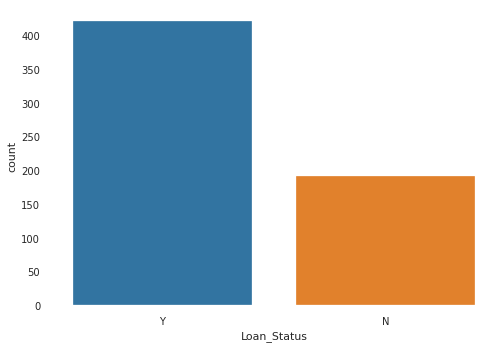

'The dataset is imbalanced'

In [9]:
sns.countplot(x = 'Loan_Status', data = train)
plt.show()
train.groupby(['Loan_Status']).Loan_Status.count()
'''The dataset is imbalanced'''

In [11]:
train.groupby(['Gender']).Loan_ID.count()

Gender
Female    112
Male      489
Name: Loan_ID, dtype: int64

In [12]:
train.groupby(['Loan_Status', 'Gender']).Loan_Status.count()

Loan_Status  Gender
N            Female     37
             Male      150
Y            Female     75
             Male      339
Name: Loan_Status, dtype: int64

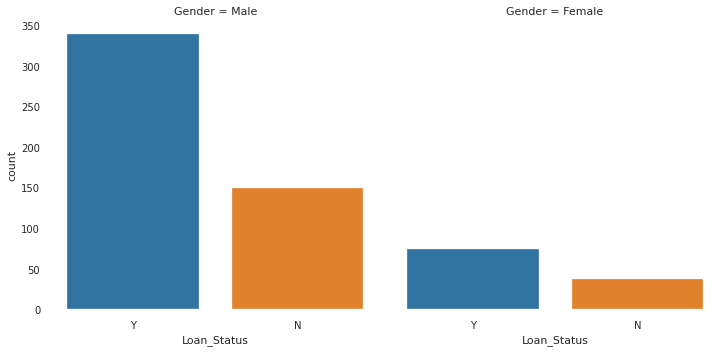

Percent of Male who got loan 69.32515337423312
Percent of Women who got loan 66.96428571428571


In [13]:
sns.catplot(x='Loan_Status', col='Gender', kind='count', data=train)
plt.show()
print('Percent of Male who got loan', train[(train.Loan_Status=='Y')&(train.Gender=='Male')].Gender.count()/train[(train.Gender=='Male')].Gender.count()*100)
print('Percent of Women who got loan', train[(train.Loan_Status=='Y')&(train.Gender=='Female')].Gender.count()/train[(train.Gender=='Female')].Gender.count()*100)

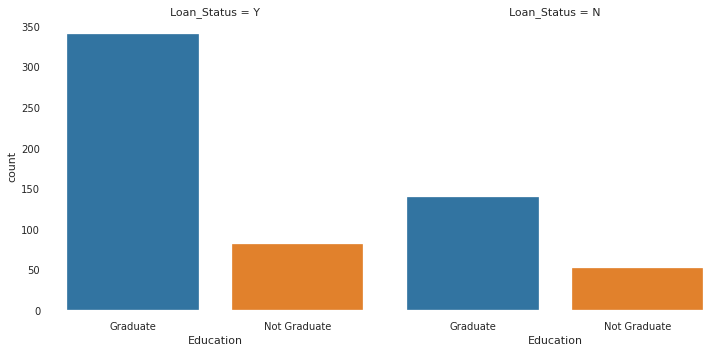

Percent of Graduate who got loan 70.83333333333334
Percent of Non Graduate who got loan 61.19402985074627


In [14]:
sns.catplot(x='Education', col='Loan_Status', kind='count', data=train)
plt.show()
print('Percent of Graduate who got loan', train[(train.Loan_Status=='Y')&(train.Education=='Graduate')].Education.count()/train[(train.Education=='Graduate')].Education.count()*100)
print('Percent of Non Graduate who got loan', train[(train.Loan_Status=='Y')&(train.Education!='Graduate')].Education.count()/train[(train.Education !='Graduate')].Education.count()*100)

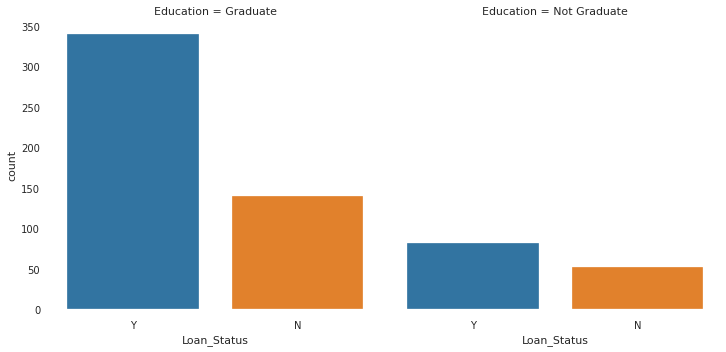

In [15]:
sns.catplot(x='Loan_Status', col='Education', kind='count', data=train)
plt.show()

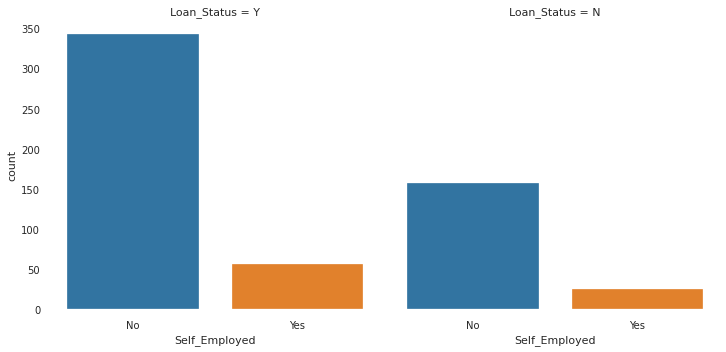

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
sns.catplot(x='Self_Employed', col='Loan_Status', kind='count', data=train)
plt.show()
train.groupby(['Self_Employed']).Self_Employed.count()

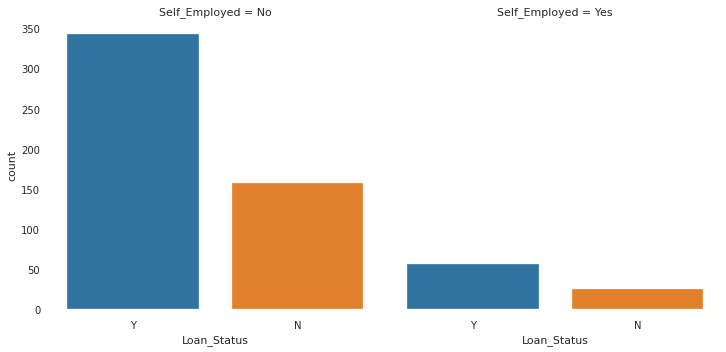

Percent of non self Candidates who got loan 68.60000000000001
Percent of Self Employed who got loan 68.29268292682927


In [17]:
sns.catplot(x='Loan_Status', col='Self_Employed', kind='count', data=train)
plt.show()
print('Percent of non self Candidates who got loan', train[(train.Loan_Status=='Y')&(train.Self_Employed=='No')].Self_Employed.count()/train[(train.Self_Employed=='No')].Self_Employed.count()*100)
print('Percent of Self Employed who got loan', train[(train.Loan_Status=='Y')&(train.Self_Employed=='Yes')].Self_Employed.count()/train[(train.Self_Employed=='Yes')].Self_Employed.count()*100)

In [18]:
train.groupby(['Loan_Status', 'Property_Area']).Loan_Status.count()

Loan_Status  Property_Area
N            Rural             69
             Semiurban         54
             Urban             69
Y            Rural            110
             Semiurban        179
             Urban            133
Name: Loan_Status, dtype: int64

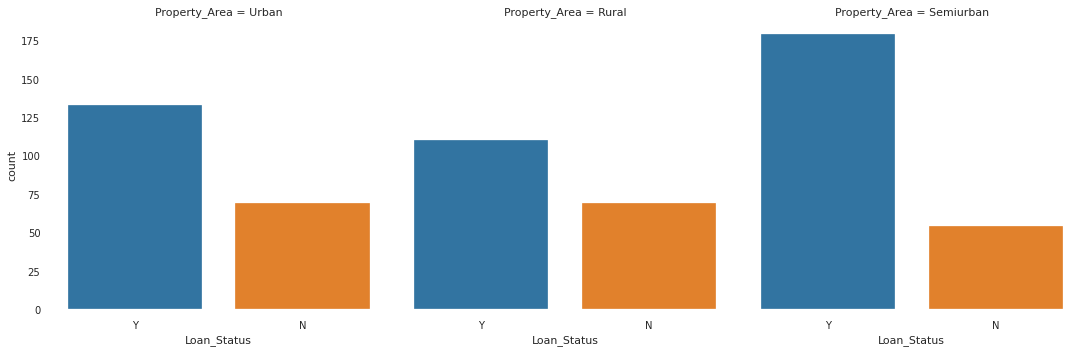

In [19]:
sns.catplot(x='Loan_Status', col='Property_Area', kind='count', data=train)
plt.show()

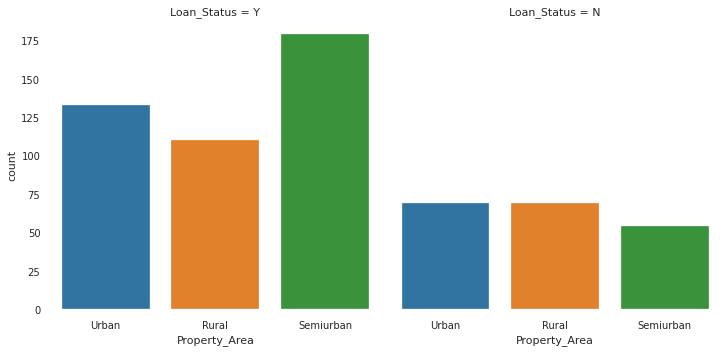

In [20]:
sns.catplot(x='Property_Area', col='Loan_Status', kind='count', data=train)
plt.show()

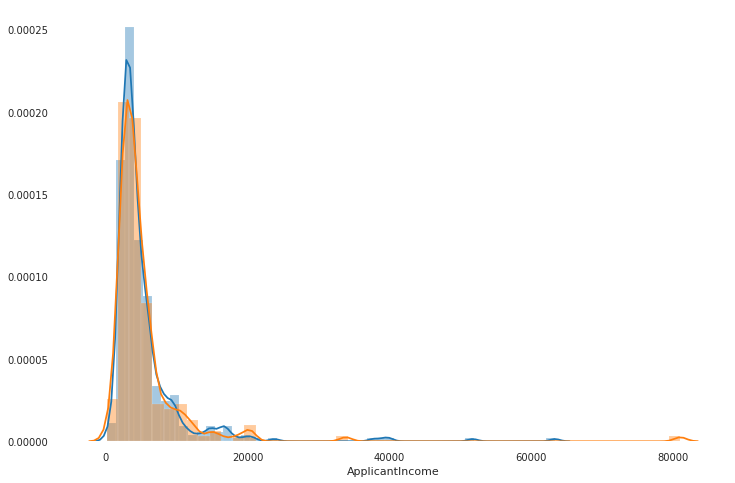

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(train[train.Loan_Status == 'Y'].ApplicantIncome)
sns.distplot(train[train.Loan_Status == 'N'].ApplicantIncome)
plt.show()

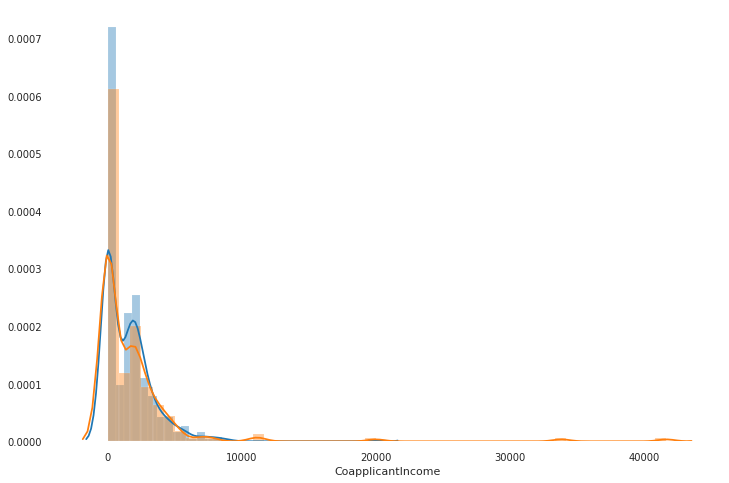

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(train[train.Loan_Status == 'Y'].CoapplicantIncome)
sns.distplot(train[train.Loan_Status == 'N'].CoapplicantIncome)
plt.show()

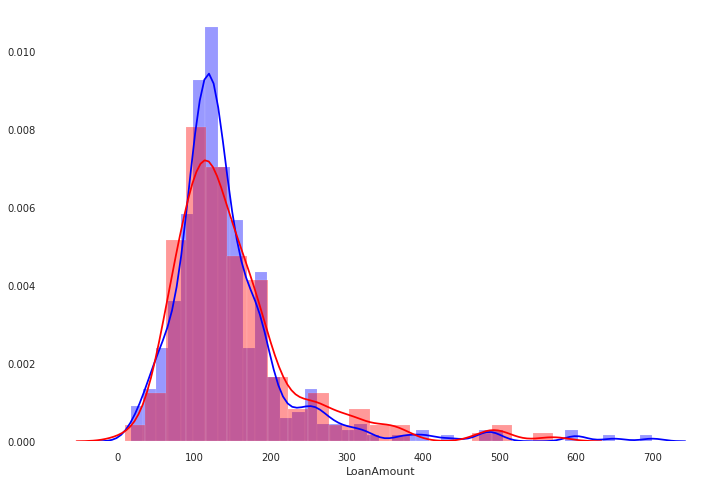

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(train[train.Loan_Status == 'Y'].LoanAmount,color='blue')
sns.distplot(train[train.Loan_Status == 'N'].LoanAmount, color='red')
plt.show()

In [24]:
train.groupby(['Loan_Status', 'Loan_Amount_Term']).Loan_Status.count()

Loan_Status  Loan_Amount_Term
N            3.0                   2
             7.0                   1
             15.0                 15
             20.0                  1
             25.0                  5
             30.0                153
             40.0                  9
Y            1.0                   1
             5.0                   2
             7.0                   3
             10.0                  3
             15.0                 29
             20.0                  3
             25.0                  8
             30.0                359
             40.0                  6
Name: Loan_Status, dtype: int64

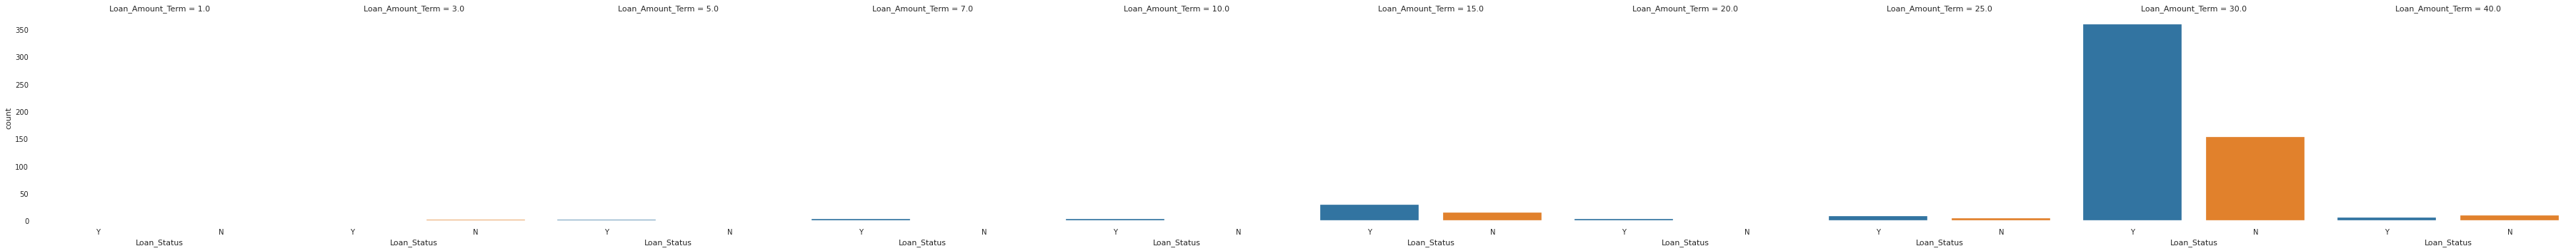

In [25]:
# plt.figure(figsize=(20,12))
sns.catplot(x='Loan_Status', col='Loan_Amount_Term', kind='count', data=train)
plt.show()

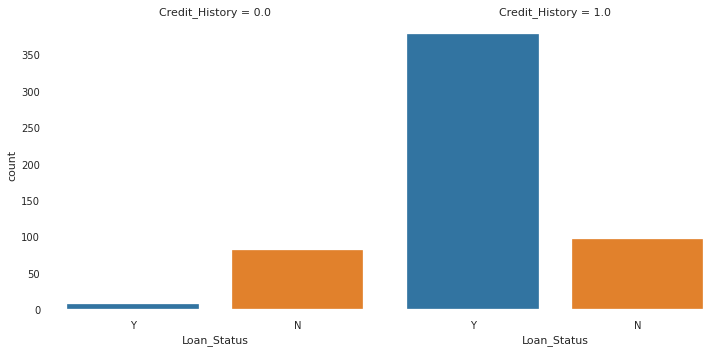

Percent of Candidates with no credit history who got loan 7.865168539325842
Percent of Candidates with credit history who got loan 79.57894736842105


In [26]:
sns.catplot(x='Loan_Status', col='Credit_History', kind='count', data=train)
plt.show()
print('Percent of Candidates with no credit history who got loan', train[(train.Loan_Status=='Y')&(train.Credit_History==0)].Credit_History.count()/train[(train.Credit_History==0)].Credit_History.count()*100)
print('Percent of Candidates with credit history who got loan', train[(train.Loan_Status=='Y')&(train.Credit_History==1)].Credit_History.count()/train[(train.Credit_History==1)].Credit_History.count()*100)

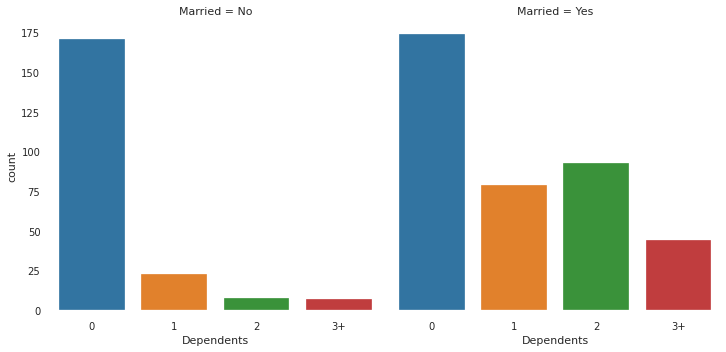

In [28]:
sns.catplot(x='Dependents', col='Married', kind='count', data=train)
plt.show()

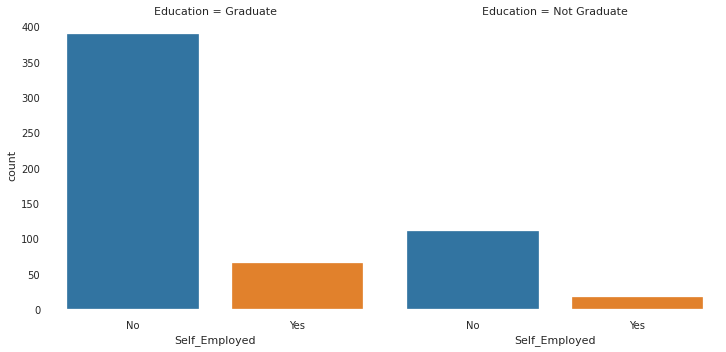

In [29]:
sns.catplot(x='Self_Employed', col='Education', kind='count', data=train)
plt.show()

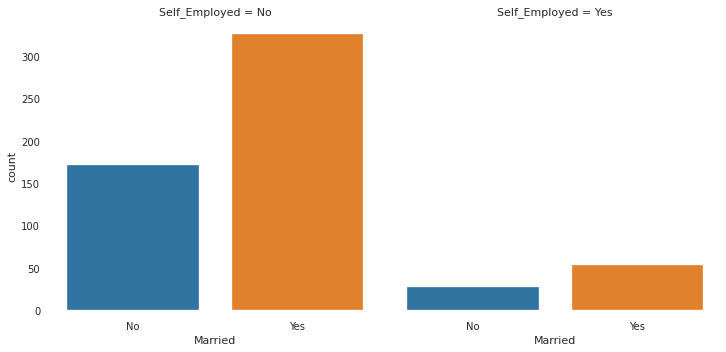

In [30]:
sns.catplot(x='Married', col='Self_Employed', kind='count', data=train)
plt.show()

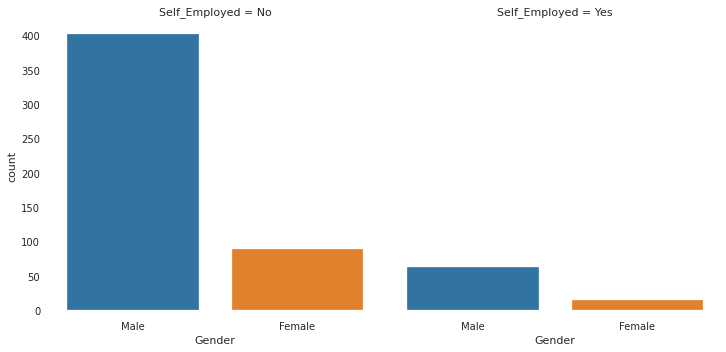

In [31]:
sns.catplot(x='Gender', col='Self_Employed', kind='count', data=train)
plt.show()

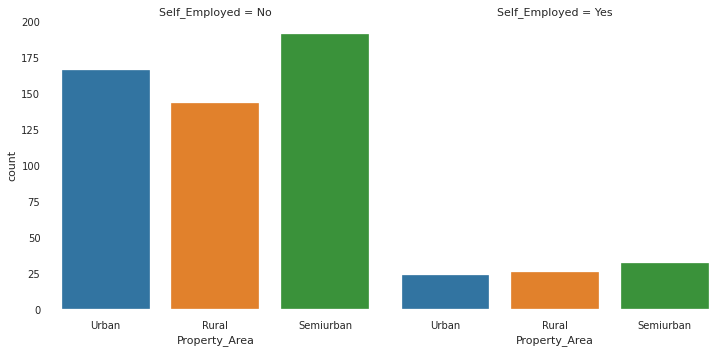

In [32]:
sns.catplot(x='Property_Area', col='Self_Employed', kind='count', data=train)
plt.show()